<a href="https://colab.research.google.com/github/CarlosSeverian/Intro_Ciencia_Dados_2021/blob/main/ICD_Trabalho_2_Chuvas_na_Australia_Grupo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICD - Introdução a Ciência de Dados
Prof. Tiago Sanches da Silva
# **Trabalho 2 - Chuvas na Austrália**
<br><br>
Data: junho/2021 <br>

- Alexandre Tambra Carmo- RA: 21.84340-6@maua.br
- Carlos Roberto Severian de Carvalho - RA: 20.84225-2@maua.br
- Heliana Lombardi Artigiani - RA: 20.84211-2@maua.br
- Roni Caruso - RA: 21.84384-8@maua.br



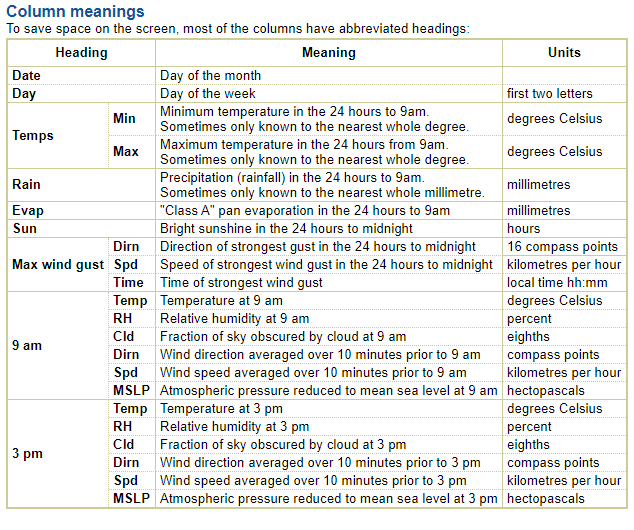

http://www.bom.gov.au/climate/data/


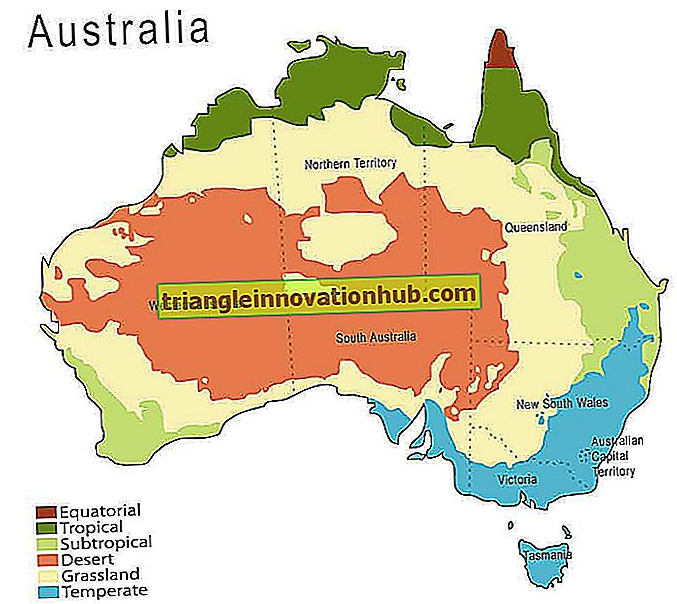

# Carregando Bibliotecas e Dados

In [ ]:
!pip install gitly
from gitly.colab.plot import GitlyPlotter
gitly = GitlyPlotter('github')

In [2]:
import os
if os.path.isfile('ChuvaAustralia.rar'):
    os.remove("ChuvaAustralia.rar")

# Os arquivos estão depositados no MEGA.nz
!apt-get install megatools   # instalando ferramenta do MEGA.nz
!megadl 'https://mega.nz/#!JlFlnY5Q!ouHNidyaAFthvSf8YVnQ4TSDeUjvPiKiipXpBdDbcCg'  # Download do arquivo compactado
!unrar x -o+ 'ChuvaAustralia.rar'  # Descompactando (-o+ sobrepoe arquivos, caso existam)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
megatools is already the newest version (1.9.98-1build2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Downloaded ChuvaAustralia.rar

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from ChuvaAustralia.rar

Extracting  rain.csv                                                       0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 7

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns


# Função para criação de matriz de confusão
https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea <br>
https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

In [4]:
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True, figsize=None, cmap='Blues', title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

# Carregando arquivos

In [5]:
# Carregando Arquivos
df_rain_original = pd.read_csv('rain.csv')
df_clima = pd.read_csv('climatebycity.CSV', sep=';')
df_altitude = pd.read_csv('Altitude_AUS.csv', sep=';')
df_densidade = pd.read_csv('cidades_AU_densidade.csv', sep=';')

df_ventos = pd.read_csv('Ventos.csv', sep=';')
df_ventos['Grs'] = df_ventos['Grs'].str.replace(',','.')
df_ventos['Grs'] = df_ventos['Grs'].astype('float')

# https://www.iag.usp.br/astronomia/datas-de-mudanca-das-fases-da-lua
df_lua = pd.read_csv('Lua2012a2016.csv', sep=';')
df_lua['Data'] = pd.to_datetime(df_lua['Data'])
df_lua.columns = ['Date','Lua']

# Inserindo o Tipo de Clima, a Densidade Demográfica
# e a Altitude por Localidade

In [6]:
# Incorporando o Clima no dataframe original
df_rain_original = df_rain_original.merge(df_clima,how='left')
# Incorporando a Altitude dataframe original
df_rain_original = df_rain_original.merge(df_altitude,how='left')
# Incorporando a Densidade Demográfica dataframe original
df_rain_original = df_rain_original.merge(df_densidade,how='left')

In [7]:
df_rain_original.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Clima,AltitudeMetros,persons_km2
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,Temperado,165,2.3
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,Temperado,165,2.3
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,Temperado,165,2.3


# Tratando Campos


In [8]:
# Transformando a Data
df_rain_original['Date'] = pd.to_datetime(df_rain_original['Date'], errors='coerce')
df_rain_original['ANO'] = df_rain_original['Date'].dt.year
df_rain_original['MES'] = df_rain_original['Date'].dt.month
df_rain_original['DIA'] = df_rain_original['Date'].dt.day

In [9]:
#Aplicando OneHotEncode nos Campos RainTomorrow e RainToday
df_rain_original['RainTomorrow'] = df_rain_original['RainTomorrow'].replace({'No': 0, 'Yes': 1})
df_rain_original['RainTomorrow'] = df_rain_original['RainTomorrow'].fillna(0)

df_rain_original['RainToday'] = df_rain_original['RainToday'].replace({'No': 0, 'Yes': 1})
df_rain_original['RainToday'] = df_rain_original['RainToday'].fillna(0)

# Tratamento de Nulos

In [10]:
# Verificar a presença de dados Nulos
print(' ------ Verificando a presença de Nulos', '-'*40)
print(df_rain_original.isnull().sum().sort_values(ascending = False))

 ------ Verificando a presença de Nulos ----------------------------------------
Sunshine          67816
Evaporation       60843
Cloud3pm          57094
Cloud9am          53657
Pressure9am       14014
Pressure3pm       13981
WindDir9am        10013
WindGustDir        9330
WindGustSpeed      9270
WindDir3pm         3778
Humidity3pm        3610
Temp3pm            2726
WindSpeed3pm       2630
Humidity9am        1774
Rainfall           1406
WindSpeed9am       1348
Temp9am             904
MinTemp             637
MaxTemp             322
Location              0
DIA                   0
MES                   0
RainToday             0
RainTomorrow          0
Clima                 0
AltitudeMetros        0
persons_km2           0
ANO                   0
Date                  0
dtype: int64


In [11]:
#Dados Nulos na direção do vento
# prencher com os dados que houver, entre eles, na mesma linha

df_rain_original['WindDir3pm'] = df_rain_original['WindDir3pm'].fillna(df_rain_original['WindDir9am'])
df_rain_original['WindDir3pm'] = df_rain_original['WindDir3pm'].fillna(df_rain_original['WindGustDir'])

df_rain_original['WindDir9am'] = df_rain_original['WindDir9am'].fillna(df_rain_original['WindDir3pm'])
df_rain_original['WindDir9am'] = df_rain_original['WindDir9am'].fillna(df_rain_original['WindGustDir'])

df_rain_original['WindGustDir'] = df_rain_original['WindGustDir'].fillna(df_rain_original['WindDir3pm'])
df_rain_original['WindGustDir'] = df_rain_original['WindGustDir'].fillna(df_rain_original['WindDir9am'])

# Para os restantes, não é possivel aferir a direção do vendo na linha.
# Preenche-los com N - Norte em todas as posições do dia, o que signinifica -sem mudança de vento-
df_rain_original['WindDir3pm'] = df_rain_original['WindDir3pm'].fillna("N")
df_rain_original['WindDir9am'] = df_rain_original['WindDir9am'].fillna("N")
df_rain_original['WindGustDir'] = df_rain_original['WindGustDir'].fillna("N")

In [12]:
# Utilizar a mesma lógica para os campos que trabalham em pares abaixo
df_rain_original['Cloud3pm'] = df_rain_original['Cloud3pm'].fillna(df_rain_original['Cloud9am'])
df_rain_original['Cloud9am'] = df_rain_original['Cloud9am'].fillna(df_rain_original['Cloud3pm'])
df_rain_original['Cloud3pm'] = df_rain_original['Cloud3pm'].fillna(0)
df_rain_original['Cloud9am'] = df_rain_original['Cloud9am'].fillna(0)

df_rain_original['Pressure9am'] = df_rain_original['Pressure9am'].fillna(df_rain_original['Pressure3pm'])
df_rain_original['Pressure3pm'] = df_rain_original['Pressure3pm'].fillna( df_rain_original['Pressure9am'])
df_rain_original['Pressure9am'] = df_rain_original['Pressure9am'].fillna(0)
df_rain_original['Pressure3pm'] = df_rain_original['Pressure3pm'].fillna(0)

df_rain_original['MinTemp'] = df_rain_original['MinTemp'].fillna(df_rain_original['MaxTemp'])
df_rain_original['MaxTemp'] = df_rain_original['MaxTemp'].fillna(df_rain_original['MinTemp'])
df_rain_original['MinTemp'] = df_rain_original['MinTemp'].fillna(0)
df_rain_original['MaxTemp'] = df_rain_original['MaxTemp'].fillna(0)

df_rain_original['Temp3pm'] = df_rain_original['Temp3pm'].fillna(df_rain_original['Temp9am'])
df_rain_original['Temp9am'] = df_rain_original['Temp9am'].fillna(df_rain_original['Temp3pm'])
df_rain_original['Temp3pm'] = df_rain_original['Temp3pm'].fillna(0)
df_rain_original['Temp9am'] = df_rain_original['Temp9am'].fillna(0)

df_rain_original['Humidity3pm'] = df_rain_original['Humidity3pm'].fillna(df_rain_original['Humidity9am'])
df_rain_original['Humidity9am'] = df_rain_original['Humidity9am'].fillna(df_rain_original['Humidity3pm'])
df_rain_original['Humidity3pm'] = df_rain_original['Humidity3pm'].fillna(0)
df_rain_original['Humidity9am'] = df_rain_original['Humidity9am'].fillna(0)


df_rain_original['WindGustSpeed'] = df_rain_original['WindGustSpeed'].fillna(df_rain_original['WindSpeed3pm'])
df_rain_original['WindGustSpeed'] = df_rain_original['WindGustSpeed'].fillna(df_rain_original['WindSpeed9am'])

df_rain_original['WindSpeed3pm'] = df_rain_original['WindSpeed3pm'].fillna(df_rain_original['WindSpeed9am'])
df_rain_original['WindSpeed3pm'] = df_rain_original['WindSpeed3pm'].fillna(df_rain_original['WindGustSpeed'])

df_rain_original['WindSpeed9am'] = df_rain_original['WindSpeed9am'].fillna(df_rain_original['WindSpeed3pm'])
df_rain_original['WindSpeed9am'] = df_rain_original['WindSpeed9am'].fillna(df_rain_original['WindGustSpeed'])

df_rain_original['WindGustSpeed'] = df_rain_original['WindGustSpeed'].fillna(0)
df_rain_original['WindSpeed3pm'] = df_rain_original['WindSpeed3pm'].fillna(0)
df_rain_original['WindSpeed9am'] = df_rain_original['WindSpeed9am'].fillna(0)

In [13]:
# Preencher campos abaixo com o valor do dia anteriormente preenchido, para cada localidade
# primeiro ordena o dataframe por localidade e depois por data
df_rain_original = df_rain_original.sort_values(by=['Location', 'Date'], ignore_index=True)

# Para esses três campos, vamos preencher os nulos com o valor válido da linha anterior
##### POR LOCALIDADE ---> não será possível utilizar o método fillna(method='ffill')

lista_Sunshine = []
lista_Evaporation = []
lista_Rainfall = []

Location_C = ''
Sunshine_fill = 0
Evaporation_fill = 0
Rainfall_fill = 0

# linha a linha do dataframe
for vind,vlinha in df_rain_original.iterrows():
  if Location_C != vlinha['Location']:  # Trocou de Cidade
    Location_C = vlinha['Location']
    Sunshine_fill=0
    Evaporation_fill = 0

  if not np.isnan(vlinha['Sunshine']) :   # Se entrar, não é nulo
    Sunshine_fill = vlinha['Sunshine']
  lista_Sunshine.append(Sunshine_fill)

  if not np.isnan(vlinha['Evaporation']):  # Se entrar, não é nulo
    Evaporation_fill = vlinha['Evaporation']
  lista_Evaporation.append(Evaporation_fill)

  if not np.isnan(vlinha['Rainfall']):  # Se entrar, não é nulo
    Rainfall_fill = vlinha['Rainfall']
  lista_Rainfall.append(Rainfall_fill)

df_rain_original['Sunshine'] = lista_Sunshine
df_rain_original['Evaporation'] = lista_Evaporation
df_rain_original['Rainfall'] = lista_Rainfall

In [14]:
# Verificar a presença de dados Nulos
print(' ------ Verificando a presença de Nulos', '-'*40)
print(df_rain_original.isnull().sum().sort_values(ascending = False))

 ------ Verificando a presença de Nulos ----------------------------------------
DIA               0
Humidity9am       0
Location          0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
WindGustDir       0
WindGustSpeed     0
WindDir9am        0
WindDir3pm        0
WindSpeed9am      0
WindSpeed3pm      0
Humidity3pm       0
MES               0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RainTomorrow      0
Clima             0
AltitudeMetros    0
persons_km2       0
ANO               0
Date              0
dtype: int64


# Eliminando anos e Inserindo Fases da Lua

https://www.iag.usp.br/astronomia/datas-de-mudanca-das-fases-da-lua

In [15]:
df_rain_original['ANO'].value_counts()

2016    17508
2014    17400
2015    17231
2009    16595
2010    16419
2013    16097
2011    15126
2012    15044
2017     8466
2008     2246
2007       61
Name: ANO, dtype: int64

In [16]:
# Vamos utilizar 5 anos:  2012/ 2013 / 2014 / 2015 / 2016
df_rain_original = df_rain_original[(df_rain_original['ANO']>= 2012) & (df_rain_original['ANO']<= 2016) ]

In [17]:
# Carregando a fases da Lua
df_rain_original = df_rain_original.merge(df_lua,how='left')

# Aplicando o OneHotEncoding
pdOneHot = pd.get_dummies(df_rain_original[['Lua']])
df_rain_original = df_rain_original.join(pdOneHot)

# Inserindo a rosa dos ventos e calculando a diferença, em graus, da mudança dos ventos

In [18]:
df_ventos

,Pontos,Grs
0,E,90.0
1,N,360.0
2,W,270.0
3,S,180.0
4,NE,45.0
5,NW,315.0
6,SE,135.0
7,SW,225.0
8,ENE,67.5
9,ESE,112.5


In [19]:
# Cruzando as direções dos ventos com a rosa dos ventos (Ventos.csv)
# Inserindo os graus para os 3 campos: WindGustDir / WindDir9am / WindDir3pm

df_ventos.columns=['WindGustDir', 'GR_WindGustDir']
df_rain_original = df_rain_original.merge(df_ventos, how='left')

df_ventos.columns=['WindDir9am', 'GR_WinDir9am']
df_rain_original = df_rain_original.merge(df_ventos, how='left')

df_ventos.columns=['WindDir3pm', 'GR_WinDir3pm']
df_rain_original = df_rain_original.merge(df_ventos, how='left')

# Criando campo com a angulação do vento (pode mudar no sentido horário ou anti-horário)
# I (Ponto inicio) /  F (Ponto Fim)
# =SE(ABS(E4-E5) <= 180;   ABS(E4-E5);   360-ABS(E4-E5)) ----> Executada bateria de testes no excel
def AnguloVento(I,F):
    if np.abs(I-F) <=180:
        Dif_GR = np.abs(I-F)
    else:
        Dif_GR = 360-np.abs(I-F)
    return (Dif_GR)

df_rain_original['Var_Wind_3pm_9am'] = df_rain_original.apply(lambda x: AnguloVento(x['GR_WinDir3pm'], x['GR_WinDir9am']), axis=1)          


In [20]:
df_rain_original['Var_Wind_3pm_9am'].value_counts()

0.0      20458
22.5     20164
45.0     12853
67.5      8388
90.0      6134
112.5     4892
135.0     4225
157.5     4127
180.0     2039
Name: Var_Wind_3pm_9am, dtype: int64

# Inserindo os demais campos com as respectivas Variações

In [21]:
# Criando os demais campos com as variações diárias
df_rain_original['Var_WindSpeed_3pm_9am'] = np.abs(df_rain_original['WindSpeed3pm'] - df_rain_original['WindSpeed9am'])
df_rain_original['Var_Temp_Min_Max'] = np.abs(df_rain_original['MaxTemp'] - df_rain_original['MinTemp'])
df_rain_original['Var_Temp_3pm_9am'] = np.abs(df_rain_original['Temp3pm'] - df_rain_original['Temp9am'])
df_rain_original['Var_Humidity_3pm_9am'] = np.abs(df_rain_original['Humidity3pm'] - df_rain_original['Humidity9am'])
df_rain_original['Var_Pressure_3pm_9am'] = np.abs(df_rain_original['Pressure3pm'] - df_rain_original['Pressure9am'])
df_rain_original['Var_Cloud_3pm_9am'] = np.abs(df_rain_original['Cloud3pm'] - df_rain_original['Cloud9am'])


In [22]:
df_rain_original.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Clima,AltitudeMetros,persons_km2,ANO,MES,DIA,Lua,Lua_CHEIA,Lua_CRESCENTE,Lua_MINGUANTE,Lua_NOVA,GR_WindGustDir,GR_WinDir9am,GR_WinDir3pm,Var_Wind_3pm_9am,Var_WindSpeed_3pm_9am,Var_Temp_Min_Max,Var_Temp_3pm_9am,Var_Humidity_3pm_9am,Var_Pressure_3pm_9am,Var_Cloud_3pm_9am
0,2012-01-02,Adelaide,29.2,40.6,0.0,11.6,11.4,NNW,56.0,N,SW,17.0,17.0,14.0,19.0,1010.0,1009.1,0.0,0.0,34.7,35.2,0.0,0,Temperado,50,2934.3,2012,1,2,CRESCENTE,0,1,0,0,337.5,360.0,225.0,135.0,0.0,11.4,0.5,5.0,0.9,0.0
1,2012-01-03,Adelaide,25.3,35.9,0.2,35.0,10.4,SW,44.0,SW,SW,9.0,15.0,61.0,24.0,1013.4,1011.3,0.0,0.0,26.8,35.0,0.0,0,Temperado,50,2934.3,2012,1,3,CRESCENTE,0,1,0,0,225.0,225.0,225.0,0.0,6.0,10.6,8.2,37.0,2.1,0.0
2,2012-01-04,Adelaide,17.5,26.4,0.0,9.4,13.3,SSE,41.0,S,SSE,17.0,17.0,32.0,32.0,1020.9,1019.1,0.0,0.0,26.3,26.3,0.0,0,Temperado,50,2934.3,2012,1,4,CRESCENTE,0,1,0,0,157.5,180.0,157.5,22.5,0.0,8.9,0.0,0.0,1.8,0.0


# Criando DataFrame com as features necessárias

In [23]:
df_rain_original.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Clima', 'AltitudeMetros',
       'persons_km2', 'ANO', 'MES', 'DIA', 'Lua', 'Lua_CHEIA', 'Lua_CRESCENTE',
       'Lua_MINGUANTE', 'Lua_NOVA', 'GR_WindGustDir', 'GR_WinDir9am',
       'GR_WinDir3pm', 'Var_Wind_3pm_9am', 'Var_WindSpeed_3pm_9am',
       'Var_Temp_Min_Max', 'Var_Temp_3pm_9am', 'Var_Humidity_3pm_9am',
       'Var_Pressure_3pm_9am', 'Var_Cloud_3pm_9am'],
      dtype='object')

In [24]:
Lista_Campos = ['Date', 'Location', 'RainTomorrow', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
           'RainToday', 'Clima', 'AltitudeMetros', 'Lua_CHEIA', 'Lua_CRESCENTE', 
           'Lua_MINGUANTE', 'Lua_NOVA', 'GR_WindGustDir', 'Var_Wind_3pm_9am', 'Var_WindSpeed_3pm_9am',
           'Var_Temp_Min_Max', 'Var_Temp_3pm_9am', 'Var_Humidity_3pm_9am', 
           'Var_Pressure_3pm_9am', 'Var_Cloud_3pm_9am', "persons_km2"]

df_rain = df_rain_original[Lista_Campos]

In [25]:
df_rain.head(3)

,Date,Location,RainTomorrow,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,Clima,AltitudeMetros,Lua_CHEIA,Lua_CRESCENTE,Lua_MINGUANTE,Lua_NOVA,GR_WindGustDir,Var_Wind_3pm_9am,Var_WindSpeed_3pm_9am,Var_Temp_Min_Max,Var_Temp_3pm_9am,Var_Humidity_3pm_9am,Var_Pressure_3pm_9am,Var_Cloud_3pm_9am,persons_km2
0,2012-01-02,Adelaide,0,0.0,11.6,11.4,56.0,0.0,Temperado,50,0,1,0,0,337.5,135.0,0.0,11.4,0.5,5.0,0.9,0.0,2934.3
1,2012-01-03,Adelaide,0,0.2,35.0,10.4,44.0,0.0,Temperado,50,0,1,0,0,225.0,0.0,6.0,10.6,8.2,37.0,2.1,0.0,2934.3
2,2012-01-04,Adelaide,0,0.0,9.4,13.3,41.0,0.0,Temperado,50,0,1,0,0,157.5,22.5,0.0,8.9,0.0,0.0,1.8,0.0,2934.3


# Verificando Correlações

In [26]:
# Verificando correlações
matrix_corr = df_rain.corr().style.background_gradient(cmap='coolwarm')
matrix_corr

,RainTomorrow,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,AltitudeMetros,Lua_CHEIA,Lua_CRESCENTE,Lua_MINGUANTE,Lua_NOVA,GR_WindGustDir,Var_Wind_3pm_9am,Var_WindSpeed_3pm_9am,Var_Temp_Min_Max,Var_Temp_3pm_9am,Var_Humidity_3pm_9am,Var_Pressure_3pm_9am,Var_Cloud_3pm_9am,persons_km2
RainTomorrow,1.000000,0.226752,-0.081440,-0.179357,0.188838,0.300128,-0.013369,0.003867,-0.005684,-0.010089,0.012361,0.097951,-0.060553,0.008807,-0.332326,-0.281477,-0.180796,-0.025498,-0.024388,-0.021623
Rainfall,0.226752,1.000000,-0.036386,-0.102186,0.108087,0.497277,-0.017825,0.008095,-0.003939,-0.009422,0.006028,0.011758,-0.048644,-0.007000,-0.238559,-0.173592,-0.080847,-0.085774,-0.018288,-0.003098
Evaporation,-0.081440,-0.036386,1.000000,0.537686,0.143743,-0.114797,-0.147659,0.004377,0.012297,-0.006494,-0.010344,-0.114143,0.060916,0.031465,0.126580,0.066382,-0.064037,0.192536,0.175608,0.011035
Sunshine,-0.179357,-0.102186,0.537686,1.000000,0.066017,-0.134267,-0.225099,0.003715,0.005328,0.002385,-0.011287,-0.086952,0.106069,0.045596,0.185826,0.120180,0.019065,0.218126,0.284163,0.036759
WindGustSpeed,0.188838,0.108087,0.143743,0.066017,1.000000,0.123630,0.065316,0.016096,0.005135,-0.010513,-0.009623,0.110721,-0.101602,0.276696,-0.067802,-0.090398,-0.091889,0.083865,0.034924,-0.037306
RainToday,0.300128,0.497277,-0.114797,-0.134267,0.123630,1.000000,-0.013842,0.002677,-0.007687,-0.004344,0.009841,0.072938,-0.087809,-0.037013,-0.390042,-0.279910,-0.088503,-0.186916,0.002657,-0.023139
AltitudeMetros,-0.013369,-0.017825,-0.147659,-0.225099,0.065316,-0.013842,1.000000,0.000942,-0.000807,0.000388,-0.000405,0.033878,-0.037597,-0.047565,0.099026,0.116477,0.072413,-0.070382,-0.122050,0.011524
Lua_CHEIA,0.003867,0.008095,0.004377,0.003715,0.016096,0.002677,0.000942,1.000000,-0.320523,-0.288313,-0.294467,0.016564,-0.000496,-0.004773,0.004022,-0.008268,-0.011212,-0.012699,-0.015616,-0.000408
Lua_CRESCENTE,-0.005684,-0.003939,0.012297,0.005328,0.005135,-0.007687,-0.000807,-0.320523,1.000000,-0.371118,-0.379040,-0.015453,-0.008327,0.002161,0.002120,0.007844,0.005989,0.009435,0.009833,-0.000416
Lua_MINGUANTE,-0.010089,-0.009422,-0.006494,0.002385,-0.010513,-0.004344,0.000388,-0.288313,-0.371118,1.000000,-0.340950,-0.008238,0.010541,-0.000945,0.014136,0.009537,0.006177,0.007661,0.001591,0.001278


In [27]:
# Vamos retirar a feture Var_Temp_3pm_9am, que tem correlação muito alta com
# Var_Temp_Min_Max e Var_Humidity_3pm_9am
del df_rain['Var_Temp_3pm_9am']

# Visualizando novamente
matrix_corr = df_rain.corr().style.background_gradient(cmap='coolwarm')
matrix_corr

,RainTomorrow,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,AltitudeMetros,Lua_CHEIA,Lua_CRESCENTE,Lua_MINGUANTE,Lua_NOVA,GR_WindGustDir,Var_Wind_3pm_9am,Var_WindSpeed_3pm_9am,Var_Temp_Min_Max,Var_Humidity_3pm_9am,Var_Pressure_3pm_9am,Var_Cloud_3pm_9am,persons_km2
RainTomorrow,1.000000,0.226752,-0.081440,-0.179357,0.188838,0.300128,-0.013369,0.003867,-0.005684,-0.010089,0.012361,0.097951,-0.060553,0.008807,-0.332326,-0.180796,-0.025498,-0.024388,-0.021623
Rainfall,0.226752,1.000000,-0.036386,-0.102186,0.108087,0.497277,-0.017825,0.008095,-0.003939,-0.009422,0.006028,0.011758,-0.048644,-0.007000,-0.238559,-0.080847,-0.085774,-0.018288,-0.003098
Evaporation,-0.081440,-0.036386,1.000000,0.537686,0.143743,-0.114797,-0.147659,0.004377,0.012297,-0.006494,-0.010344,-0.114143,0.060916,0.031465,0.126580,-0.064037,0.192536,0.175608,0.011035
Sunshine,-0.179357,-0.102186,0.537686,1.000000,0.066017,-0.134267,-0.225099,0.003715,0.005328,0.002385,-0.011287,-0.086952,0.106069,0.045596,0.185826,0.019065,0.218126,0.284163,0.036759
WindGustSpeed,0.188838,0.108087,0.143743,0.066017,1.000000,0.123630,0.065316,0.016096,0.005135,-0.010513,-0.009623,0.110721,-0.101602,0.276696,-0.067802,-0.091889,0.083865,0.034924,-0.037306
RainToday,0.300128,0.497277,-0.114797,-0.134267,0.123630,1.000000,-0.013842,0.002677,-0.007687,-0.004344,0.009841,0.072938,-0.087809,-0.037013,-0.390042,-0.088503,-0.186916,0.002657,-0.023139
AltitudeMetros,-0.013369,-0.017825,-0.147659,-0.225099,0.065316,-0.013842,1.000000,0.000942,-0.000807,0.000388,-0.000405,0.033878,-0.037597,-0.047565,0.099026,0.072413,-0.070382,-0.122050,0.011524
Lua_CHEIA,0.003867,0.008095,0.004377,0.003715,0.016096,0.002677,0.000942,1.000000,-0.320523,-0.288313,-0.294467,0.016564,-0.000496,-0.004773,0.004022,-0.011212,-0.012699,-0.015616,-0.000408
Lua_CRESCENTE,-0.005684,-0.003939,0.012297,0.005328,0.005135,-0.007687,-0.000807,-0.320523,1.000000,-0.371118,-0.379040,-0.015453,-0.008327,0.002161,0.002120,0.005989,0.009435,0.009833,-0.000416
Lua_MINGUANTE,-0.010089,-0.009422,-0.006494,0.002385,-0.010513,-0.004344,0.000388,-0.288313,-0.371118,1.000000,-0.340950,-0.008238,0.010541,-0.000945,0.014136,0.006177,0.007661,0.001591,0.001278


In [28]:
target_corr = matrix_corr.data.RainTomorrow
df_corr = target_corr.abs().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm')
df_corr

,RainTomorrow
RainTomorrow,1.000000
Var_Temp_Min_Max,0.332326
RainToday,0.300128
Rainfall,0.226752
WindGustSpeed,0.188838
Var_Humidity_3pm_9am,0.180796
Sunshine,0.179357
GR_WindGustDir,0.097951
Evaporation,0.081440
Var_Wind_3pm_9am,0.060553


# Separando o dataframe por Clima 

In [29]:
df_rain['Clima'].value_counts()

Temperado      47662
Subtropical    20622
Tropical        8374
Pastagem        3518
Deserto         3104
Name: Clima, dtype: int64

In [30]:
df_Temperado   = df_rain[df_rain['Clima']=='Temperado']
df_Subtropical = df_rain[df_rain['Clima']=='Subtropical']
df_Tropical    = df_rain[df_rain['Clima']=='Tropical']
df_Pastagem    = df_rain[df_rain['Clima']=='Pastagem']
df_Deserto     = df_rain[df_rain['Clima']=='Deserto']

# Veriricando a proporcionalidade para os dois escolhidos para o trabalho
print('Clima Temperado')
print('Proporção de SEM Chuva(0) e COM Chuva(1) no dia seguinte:')
print(df_Temperado['RainTomorrow'].value_counts())
print('')
print('Clima Subtropical')
print('Proporção de SEM Chuva(0) e COM Chuva(1) no dia seguinte:')
print(df_Subtropical['RainTomorrow'].value_counts())
print('')
print('Clima Deserto')
print('Proporção de SEM Chuva(0) e COM Chuva(1) no dia seguinte:')
print(df_Deserto['RainTomorrow'].value_counts())

Clima Temperado
Proporção de SEM Chuva(0) e COM Chuva(1) no dia seguinte:
0    36531
1    11131
Name: RainTomorrow, dtype: int64

Clima Subtropical
Proporção de SEM Chuva(0) e COM Chuva(1) no dia seguinte:
0    15985
1     4637
Name: RainTomorrow, dtype: int64

Clima Deserto
Proporção de SEM Chuva(0) e COM Chuva(1) no dia seguinte:
0    2896
1     208
Name: RainTomorrow, dtype: int64


## Separando em X,y e Aumentando Estatisticamente a proporção

In [31]:
Lista_Campos = ['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'RainToday', 
                'AltitudeMetros', 'Lua_CHEIA', 'Lua_CRESCENTE', 'Lua_MINGUANTE', 'Lua_NOVA', 
                'GR_WindGustDir', 'Var_Wind_3pm_9am', 'Var_WindSpeed_3pm_9am', 'Var_Temp_Min_Max', 
                'Var_Humidity_3pm_9am', 'Var_Pressure_3pm_9am', 'Var_Cloud_3pm_9am', "persons_km2"]

DadosT_X = np.array(df_Temperado[Lista_Campos])
DadosS_X = np.array(df_Subtropical[Lista_Campos])
DadosD_X = np.array(df_Deserto[Lista_Campos])

DadosT_y = np.array(df_Temperado['RainTomorrow'])
DadosS_y = np.array(df_Subtropical['RainTomorrow'])
DadosD_y = np.array(df_Deserto['RainTomorrow'])

In [32]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=Warning)

sm = SMOTE(random_state=123)
DadosT_X, DadosT_y = sm.fit_resample(DadosT_X, DadosT_y)
DadosS_X, DadosS_y = sm.fit_resample(DadosS_X, DadosS_y)
DadosD_X, DadosD_y = sm.fit_resample(DadosD_X, DadosD_y)

# Verificando
print('Temperado:')
print(pd.DataFrame(DadosT_y).value_counts())
print('')
print('SubTropical:')
print(pd.DataFrame(DadosS_y).value_counts())
print('')
print('Deserto:')
print(pd.DataFrame(DadosD_y).value_counts())

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Temperado:
1    36531
0    36531
dtype: int64

SubTropical:
1    15985
0    15985
dtype: int64

Deserto:
1    2896
0    2896
dtype: int64


# Normalizando os Dados X

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

scaler = StandardScaler()
DadosT_X = scaler.fit_transform(DadosT_X)
DadosS_X = scaler.fit_transform(DadosS_X)
DadosD_X = scaler.fit_transform(DadosD_X)

#### O Melhor Resultado Obtido em sala de Aula para
#### o Dataframe foi o Light Gradient Boosting Machine

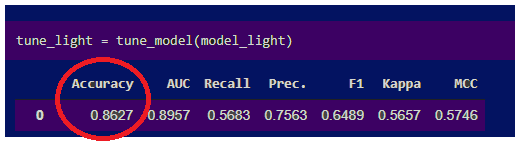

### Com os seguintes parâmetros

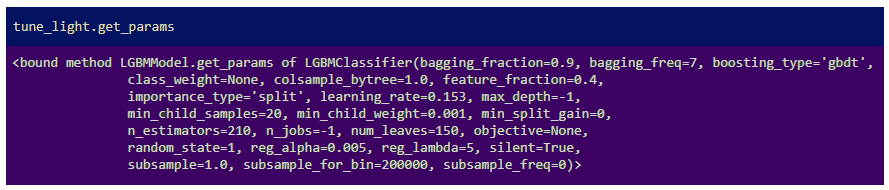

#  Para nossos Modelos iremos
#  Utilizar o mesmo Classificador, com os mesmos parâmetros.

# Dividindo em Treino e Teste

In [34]:
# Dividindo em Treino e Teste

XT_treino, XT_teste, yT_treino, yT_teste = train_test_split(DadosT_X,DadosT_y, test_size = 0.20, random_state=123)
XS_treino, XS_teste, yS_treino, yS_teste = train_test_split(DadosS_X,DadosS_y, test_size = 0.20, random_state=123)
XD_treino, XD_teste, yD_treino, yD_teste = train_test_split(DadosD_X,DadosD_y, test_size = 0.20, random_state=123)

# Criando modelo - para Clima Temperado

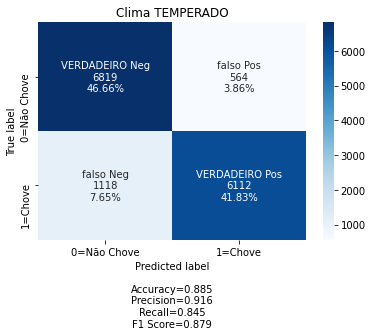


Score do Modelo - Clima Temperado ....: 88.49 %



In [35]:
from lightgbm import LGBMClassifier

modelo_T = LGBMClassifier(bagging_fraction=0.9, bagging_freq=7, boosting_type='gbdt',
                          class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
                          importance_type='split', learning_rate=0.153, max_depth=-1, 
                          min_child_samples=20, min_child_weight=0.001, min_split_gain=0, 
                          n_estimators=210, n_jobs=-1, num_leaves=150, objective=None, 
                          random_state=1, reg_alpha=0.005, reg_lambda=5, silent=True, 
                          subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

modelo_T.fit(XT_treino, yT_treino)
yT_predicao = modelo_T.predict(XT_teste)

# Matriz de Confusão
cf_matrix = confusion_matrix(yT_teste, yT_predicao)
GrupoNomes = ['VERDADEIRO Neg','falso Pos','falso Neg','VERDADEIRO Pos']
Categorias = ['0=Não Chove', '1=Chove']
make_confusion_matrix(cf_matrix, group_names=GrupoNomes, categories=Categorias, cmap='Blues', title='Clima TEMPERADO')
plt.show()

print('')
print('Score do Modelo - Clima Temperado ....:', np.round(modelo_T.score(XT_teste,yT_teste)*100,decimals=2), '%')
print('==================================================')
print('')

# Criando modelo - Clima Subtropical

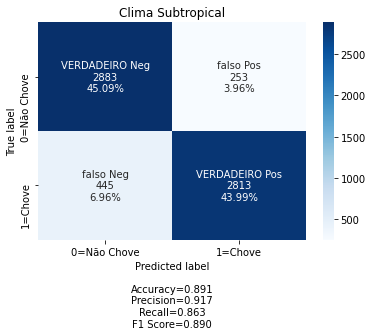


Score do Modelo - Clima Subtropical ....: 89.08 %



In [36]:
modelo_S = LGBMClassifier(bagging_fraction=0.9, bagging_freq=7, boosting_type='gbdt',
                          class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
                          importance_type='split', learning_rate=0.153, max_depth=-1, 
                          min_child_samples=20, min_child_weight=0.001, min_split_gain=0, 
                          n_estimators=210, n_jobs=-1, num_leaves=150, objective=None, 
                          random_state=1, reg_alpha=0.005, reg_lambda=5, silent=True, 
                          subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

modelo_S.fit(XS_treino, yS_treino)
yS_predicao = modelo_S.predict(XS_teste)

# Matriz de Confusão
cf_matrix = confusion_matrix(yS_teste, yS_predicao)
GrupoNomes = ['VERDADEIRO Neg','falso Pos','falso Neg','VERDADEIRO Pos']
Categorias = ['0=Não Chove', '1=Chove']
make_confusion_matrix(cf_matrix, group_names=GrupoNomes, categories=Categorias, cmap='Blues', title='Clima Subtropical')
plt.show()

print('')
print('Score do Modelo - Clima Subtropical ....:', np.round(modelo_S.score(XS_teste,yS_teste)*100,decimals=2), '%')
print('==================================================')
print('')

# Criando modelo - Clima Deserto

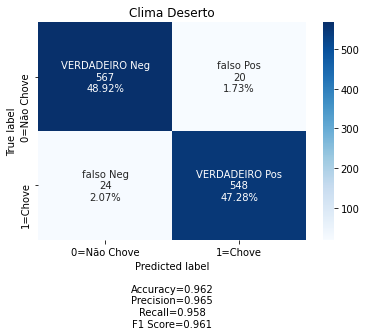


Score do Modelo - Clima Deserto ....: 96.2 %



In [37]:
modelo_D = LGBMClassifier(bagging_fraction=0.9, bagging_freq=7, boosting_type='gbdt',
                          class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
                          importance_type='split', learning_rate=0.153, max_depth=-1, 
                          min_child_samples=20, min_child_weight=0.001, min_split_gain=0, 
                          n_estimators=210, n_jobs=-1, num_leaves=150, objective=None, 
                          random_state=1, reg_alpha=0.005, reg_lambda=5, silent=True, 
                          subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

modelo_D.fit(XD_treino, yD_treino)
yD_predicao = modelo_D.predict(XD_teste)

# Matriz de Confusão
cf_matrix = confusion_matrix(yD_teste, yD_predicao)
GrupoNomes = ['VERDADEIRO Neg','falso Pos','falso Neg','VERDADEIRO Pos']
Categorias = ['0=Não Chove', '1=Chove']
make_confusion_matrix(cf_matrix, group_names=GrupoNomes, categories=Categorias, cmap='Blues', title='Clima Deserto')
plt.show()

print('')
print('Score do Modelo - Clima Deserto ....:', np.round(modelo_D.score(XD_teste,yD_teste)*100,decimals=2), '%')
print('==================================================')
print('')

# CONCLUSÃO

Melhor Resultado obtido com o PyCaret em sala de aula para o dataset original,<br>
utilizando o Tuning para o Classificador **Light Gradient Boosting Machine** - Score: *86,27%*



# Modelagem Proposta - Grupo 1
1) Foram utilizados os anos de 2012 a 2016 (5 anos)

2) Incorporados ao Dataframe Original:
- Novo Dataframe com o CLIMA DE CADA CIDADE
- Novo Dataframe com a ALTITUDE DE CADA CIDADE
- Novo Dataframe com as FASES DA LUA
- Novo Dataframe com a DIREÇÃO DOS VENTOS EM GRAUS
- Novo Dataframe com a DENSIDADE DEMOGRÁFIA

3) Estratégia de Preenchimento de Nulos
- Nenhuma linha do dataframe foi excluida pela existência de nulos.
- Para os campos com medições diárias (9am e 3pm) e para os campos com as direções dos ventos, foi executado o intercâmbio entre eles, nas próprias linhas, para preencher os nulos. Para as linhas que continuaram nulas, foi feito preenchimento com zero.
- Para os Campos **Sunshine, Evaporation e Rainfall** os nulos foram preenchidos com dia anterior mais próximo diferente de nulo, **POR LOCALIDADE**

4) Finalização da Modelagem
- A partir dos campos de direções dos ventos foi obtida a feature com o deslocamento diário do vento em graus e eliminados os campos originais das variáveis preditoras.
- A partir dos campos com medições diárias (9am e 3pm) foram criadas features de suas respectivas diferenças e eliminados os campos originais das variáveis preditoras.
- Observada a correlação entre as variáveis, a feature 'Var_Temp_3pm_9am' (diferença de temperatura entre as 9am e 3pm) foi eliminada, por ter alta correlação com outras duas features.
- O dataframe original foi dividido por clima (Temperado, Subtropical, Tropical, Pastagem e Deserto).
- Foi utilizada a técnica de OverSampling, individualmente, para os 3 climas escolhidos para estudo (Temperado, Subtropical, Deserto).
- Os dados foram Normalizados e dividos em Treinamento e Teste, individualmente.
- Foi utilizado o classificador **Light Gradient Boosting Machine** com os mesmos hiperparâmetros obtidos em sala de aula com o Pycaret.






## Resultados Obtidos com o Light Gradient Boosting Machine

###Clima Temperado ..: **Score do Modelo ....: 88.49 %**
###Clima SubTropical ..: **Score do Modelo ....: 89.08 %**
###Clima Deserto .........: **Score do Modelo ....: 96.2 %**

###*Todos os resultados alcançados foram superiores aos obtidos pelo Auto ML*

# Fim -------------